In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#df = pd.read_excel("C:/Users/20201954/Desktop/data/cleaned_qMRI_numerical.xlsx")
#df = df.drop(columns=['volume', 'trk_leng', 'trk_ang', 'dix_snr', 'dti_snr0'])


df = pd.read_excel("C:/Users/20201954/Desktop/data/quantitative MRI.xlsx")
df = df.drop(columns=['subject', 'subjectID', 'sessionID', 'muscle', 'side', 'sideID','volume', 'trk_leng', 'trk_ang', 'dix_snr']) # voor originele set

C:\Users\20201954\AppData\Local\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


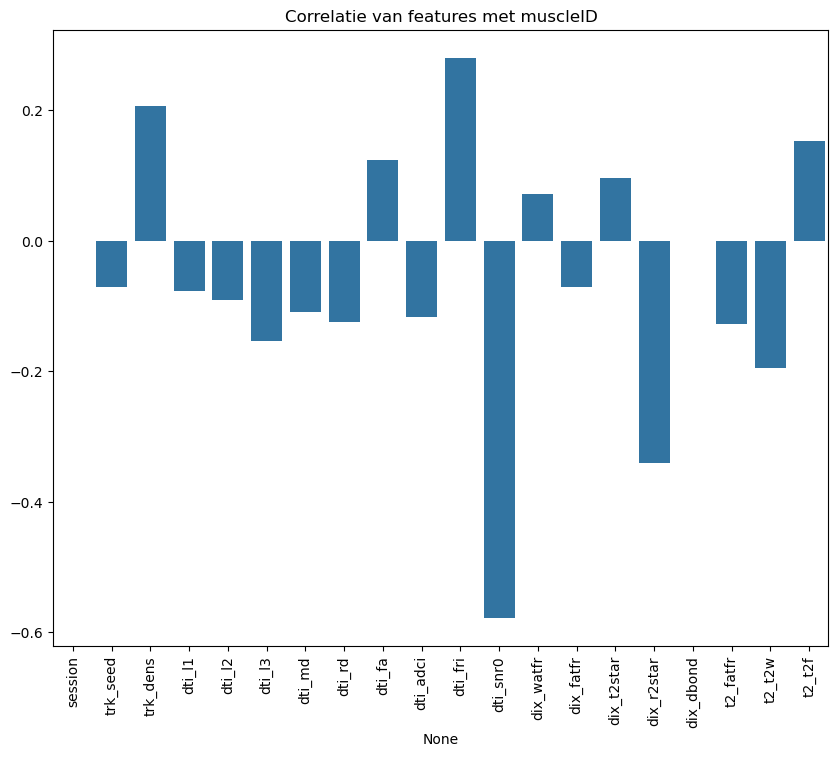

In [3]:
# Correlatie berekenen
corr_matrix = df.corr()

# Correlatie met muscleID
correlation_with_target = corr_matrix['muscleID'].drop('muscleID')

# Plotten
plt.figure(figsize=(10,8))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values)
plt.xticks(rotation=90)
plt.title("Correlatie van features met muscleID")
plt.show()


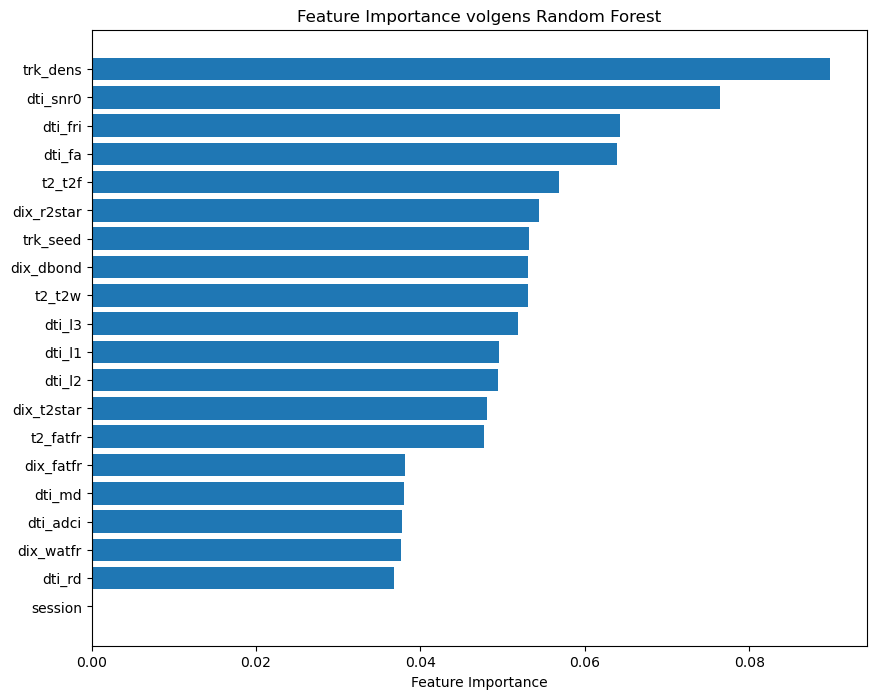

In [4]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Data splitsen
X = df.drop(columns=['muscleID'])  # features
y = df['muscleID']  # target

# Random Forest model trainen
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Feature Importance
importances = rf.feature_importances_

# Feature importance plotten
indices = np.argsort(importances)
plt.figure(figsize=(10,8))
plt.barh(range(X.shape[1]), importances[indices], align='center')
plt.yticks(range(X.shape[1]), [X.columns[i] for i in indices])
plt.xlabel("Feature Importance")
plt.title("Feature Importance volgens Random Forest")
plt.show()


In [5]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Random Forest model aanmaken
model = RandomForestClassifier(n_estimators=100, random_state=42)

# RFE uitvoeren
rfe = RFE(estimator=model, n_features_to_select=10)  # Selecteer 10 beste features
rfe.fit(X, y)

# Belangrijkste features
selected_features = X.columns[rfe.support_]
print("Belangrijkste features volgens RFE:", selected_features)


Belangrijkste features volgens RFE: Index(['trk_dens', 'dti_l1', 'dti_l2', 'dti_l3', 'dti_fa', 'dti_fri',
       'dti_snr0', 'dix_r2star', 'dix_dbond', 't2_t2f'],
      dtype='object')


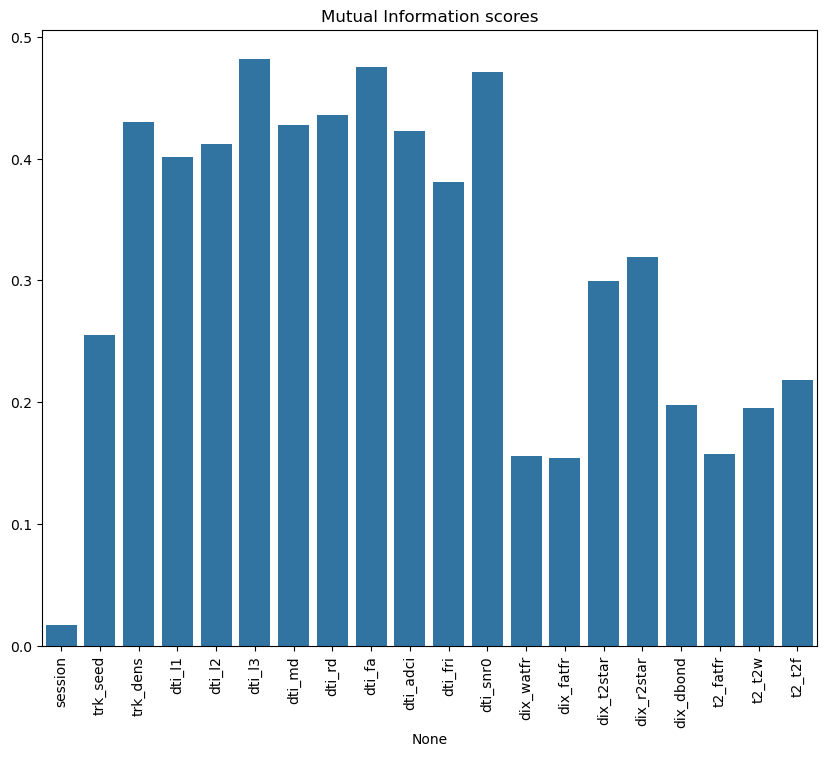

In [6]:
from sklearn.feature_selection import mutual_info_classif

# Mutual information berekenen
mutual_info = mutual_info_classif(X, y)

# Plotten
plt.figure(figsize=(10,8))
sns.barplot(x=X.columns, y=mutual_info)
plt.xticks(rotation=90)
plt.title("Mutual Information scores")
plt.show()


Belangrijkste features volgens Lasso: Index(['trk_dens', 'dti_l2', 'dti_fri', 'dti_snr0', 'dix_watfr', 'dix_r2star',
       't2_fatfr', 't2_t2w', 't2_t2f'],
      dtype='object')


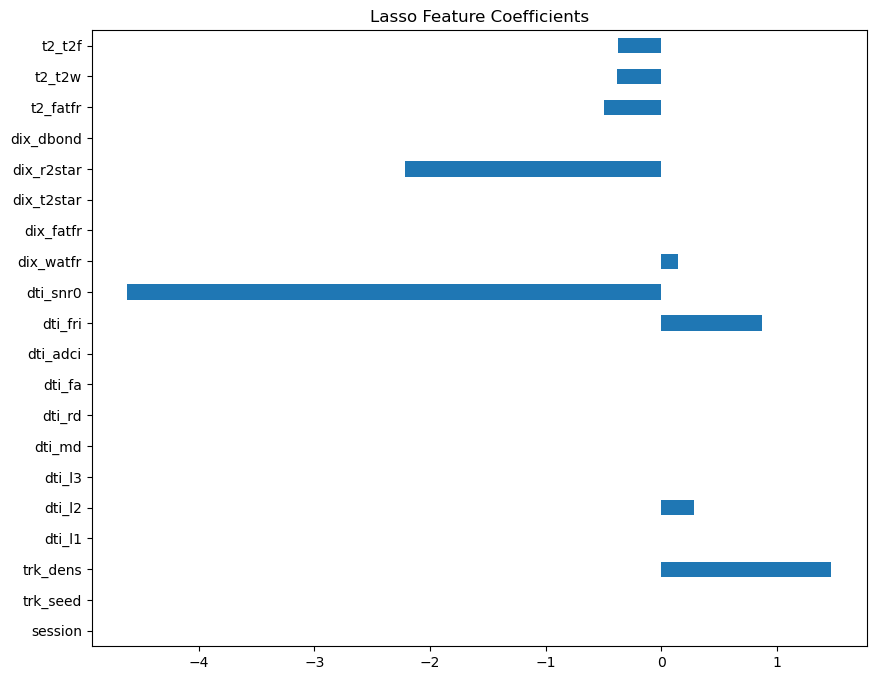

In [7]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

# Data schalen
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Lasso model trainen
lasso = LassoCV(cv=5, random_state=42).fit(X_scaled, y)

# Feature coëfficiënten
lasso_coeff = pd.Series(lasso.coef_, index=X.columns)

# Niet-nul coëfficiënten zijn de geselecteerde features
selected_features = lasso_coeff[lasso_coeff != 0].index
print("Belangrijkste features volgens Lasso:", selected_features)

# Plotten van de coëfficiënten
plt.figure(figsize=(10,8))
lasso_coeff.plot(kind='barh')
plt.title("Lasso Feature Coefficients")
plt.show()
